In [1]:
pip install tabulate


In [2]:
pip install dash plotly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 20.4 MB/s eta 0:00:00


In [26]:
pip install pandas matplotlib lxml

In [3]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

data_path = 'report-json.json'

# Carregar o arquivo JSON
with open(data_path) as f:
    data = json.load(f)

# Exibir algumas chaves do JSON para entender a estrutura
print("Keys:")
for key in data.keys():

    print(key)

Keys:
collection
environment
globals
run
consoleLogs


In [4]:
import json
import pandas as pd
from tabulate import tabulate

data_path = 'report-json.json'

def process_chunk(chunk):
    normalized_data = []
    total_items = 0
    total_sub_items = 0
    total_requests = 0
    total_responses = 0

    for item in chunk['collection']['item']:
        total_items += 1
        for sub_item in item.get('item', []):
            total_sub_items += 1

            # Verificar se a chave 'request' está presente
            if 'request' in sub_item:
                total_requests += 1
                request_info = {
                    "Endpoint": sub_item.get('name', 'N/A'),
                    "Method": sub_item['request'].get('method', 'N/A'),
                    "URL": sub_item['request']['url'].get('raw', 'N/A'),
                    "Status Code": "N/A",
                    "Response Time (ms)": "N/A",
                    "Content-Type": "N/A"
                }
                normalized_data.append(request_info)

            # Verificar se a chave 'response' está presente e iterar sobre as respostas
            if 'response' in sub_item:
                for response in sub_item['response']:
                    total_responses += 1
                    response_info = {
                        "Endpoint": sub_item.get('name', 'N/A'),
                        "Method": sub_item['request'].get('method', 'N/A'),
                        "URL": sub_item['request']['url'].get('raw', 'N/A'),
                        "Status Code": response.get('code', 'N/A'),
                        "Response Time (ms)": response.get('responseTime', 'N/A'),
                        "Content-Type": response['header'][0].get('value', 'N/A') if response.get('header') else 'N/A'
                    }
                    normalized_data.append(response_info)

    return normalized_data, total_items, total_sub_items, total_requests, total_responses

# Carregar o arquivo JSON e processar em chunks
chunk_size = 1024 * 1024  # Tamanho do chunk (em bytes)
normalized_data = []
total_items = 0
total_sub_items = 0
total_requests = 0
total_responses = 0

with open(data_path, 'r') as f:
    chunk = json.load(f)
    chunk_data, chunk_items, chunk_sub_items, chunk_requests, chunk_responses = process_chunk(chunk)
    normalized_data.extend(chunk_data)
    total_items += chunk_items
    total_sub_items += chunk_sub_items
    total_requests += chunk_requests
    total_responses += chunk_responses

# Criar DataFrame a partir dos dados normalizados
df = pd.DataFrame(normalized_data)

# Função para imprimir o DataFrame em páginas
def print_paged_df(df, page_size=10):
    total_rows = len(df)
    num_pages = (total_rows // page_size) + 1

    for i in range(num_pages):
        start_row = i * page_size
        end_row = start_row + page_size
        print(f"\n===== Página {i+1} de {num_pages} =====")
        print(tabulate(df[start_row:end_row], headers='keys', tablefmt='github', showindex=False))
        print("===============")
        input("Pressione Enter para continuar...")

# Exibir contadores para verificar a quantidade de dados processados
print(f"Total de items: {total_items}")
print(f"Total de sub-items: {total_sub_items}")
print(f"Total de requests: {total_requests}")
print(f"Total de responses: {total_responses}")

# Imprimir o DataFrame paginado
print_paged_df(df, page_size=10)


Total de items: 4
Total de sub-items: 13
Total de requests: 4
Total de responses: 7

===== Página 1 de 2 =====
| Endpoint               | Method   | URL   | Status Code   | Response Time (ms)   | Content-Type     |
|------------------------|----------|-------|---------------|----------------------|------------------|
| Pong                   | GET      | N/A   | N/A           | N/A                  | N/A              |
| Pong                   | GET      | N/A   | 200           | N/A                  | application/json |
| Create Policy          | POST     | N/A   | N/A           | N/A                  | N/A              |
| Create Policy          | POST     | N/A   | 201           | N/A                  | application/json |
| Create Policy          | POST     | N/A   | 422           | N/A                  | application/json |
| Get All Policies       | GET      | N/A   | N/A           | N/A                  | N/A              |
| Get All Policies       | GET      | N/A   | 200        

In [5]:
import json
from collections import defaultdict

data_path = 'report-json.json'

# Função para contar elementos no JSON
def count_elements(data, counts=None, parent_key=''):
    if counts is None:
        counts = defaultdict(int)

    if isinstance(data, dict):
        for key, value in data.items():
            full_key = f"{parent_key}.{key}" if parent_key else key
            counts[full_key] += 1
            count_elements(value, counts, full_key)
    elif isinstance(data, list):
        list_key = f"{parent_key}[list]" if parent_key else "[list]"
        counts[list_key] += len(data)
        for item in data:
            count_elements(item, counts, parent_key)
    else:
        value_key = f"{parent_key}[value]" if parent_key else "[value]"
        counts[value_key] += 1

    return counts

# Carregar o arquivo JSON
with open(data_path, 'r') as f:
    data = json.load(f)

# Contar elementos no JSON
counts = count_elements(data)

# Agrupar e imprimir a contagem de elementos
grouped_counts = defaultdict(int)
for key, count in counts.items():
    if '.' in key:
        base_key = key.split('.')[0]
    else:
        base_key = key
    grouped_counts[base_key] += count

print("\nContagem agrupada de elementos:")
for key, count in grouped_counts.items():
    print(f"{key}: {count}")

# Imprimir contagem detalhada
print("\nContagem detalhada de elementos:")
for key, count in counts.items():
    print(f"{key}: {count}")



Contagem agrupada de elementos:
collection: 11469
environment: 20
globals: 4
run: 23019
consoleLogs: 9459

Contagem detalhada de elementos:
collection: 1
collection._: 1
collection._.postman_id: 1
collection._.postman_id[value]: 1
collection.item: 1
collection.item[list]: 4
collection.item.id: 4
collection.item.id[value]: 4
collection.item.name: 4
collection.item.name[value]: 4
collection.item.description: 4
collection.item.description.content: 4
collection.item.description.content[value]: 4
collection.item.description.type: 4
collection.item.description.type[value]: 4
collection.item.item: 4
collection.item.item[list]: 13
collection.item.item.id: 13
collection.item.item.id[value]: 13
collection.item.item.name: 13
collection.item.item.name[value]: 13
collection.item.item.request: 4
collection.item.item.request.name: 4
collection.item.item.request.name[value]: 4
collection.item.item.request.description: 4
collection.item.item.request.description.content: 3
collection.item.item.request.

In [6]:
import json
from collections import defaultdict


# Função para contar elementos no JSON
def count_elements(data, counts=None, parent_key=''):
    if counts is None:
        counts = defaultdict(int)

    if isinstance(data, dict):
        for key, value in data.items():
            full_key = f"{parent_key}.{key}" if parent_key else key
            counts[full_key] += 1
            count_elements(value, counts, full_key)
    elif isinstance(data, list):
        list_key = f"{parent_key}[list]" if parent_key else "[list]"
        counts[list_key] += len(data)
        for item in data:
            count_elements(item, counts, parent_key)
    else:
        value_key = f"{parent_key}[value]" if parent_key else "[value]"
        counts[value_key] += 1

    return counts

# Carregar o arquivo JSON
with open(data_path, 'r') as f:
    data = json.load(f)

# Contar elementos no JSON
counts = count_elements(data)

# Agrupar e imprimir a contagem de elementos
grouped_counts = defaultdict(int)
for key, count in counts.items():
    if '.' in key:
        base_key = key.split('.')[0]
    else:
        base_key = key
    grouped_counts[base_key] += count

grouped_counts_result = {key: count for key, count in grouped_counts.items()}
detailed_counts_result = {key: count for key, count in counts.items()}

grouped_counts_result, detailed_counts_result


({'collection': 11469,
  'environment': 20,
  'globals': 4,
  'run': 23019,
  'consoleLogs': 9459},
 {'collection': 1,
  'collection._': 1,
  'collection._.postman_id': 1,
  'collection._.postman_id[value]': 1,
  'collection.item': 1,
  'collection.item[list]': 4,
  'collection.item.id': 4,
  'collection.item.id[value]': 4,
  'collection.item.name': 4,
  'collection.item.name[value]': 4,
  'collection.item.description': 4,
  'collection.item.description.content': 4,
  'collection.item.description.content[value]': 4,
  'collection.item.description.type': 4,
  'collection.item.description.type[value]': 4,
  'collection.item.item': 4,
  'collection.item.item[list]': 13,
  'collection.item.item.id': 13,
  'collection.item.item.id[value]': 13,
  'collection.item.item.name': 13,
  'collection.item.item.name[value]': 13,
  'collection.item.item.request': 4,
  'collection.item.item.request.name': 4,
  'collection.item.item.request.name[value]': 4,
  'collection.item.item.request.description': 

In [7]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

data_path = 'report-json.json'

# Carregar o arquivo JSON
with open(data_path, 'r') as f:
    data = json.load(f)

# Função para normalizar os dados do JSON
def normalize_data(data):
    normalized_data = []
    for item in data['collection']['item']:
        for sub_item in item.get('item', []):
            if 'request' in sub_item:
                request_info = {
                    "Endpoint": sub_item.get('name', 'N/A'),
                    "Method": sub_item['request'].get('method', 'N/A'),
                    "URL": sub_item['request']['url'].get('raw', 'N/A'),
                    "Status Code": "N/A",
                    "Response Time (ms)": "N/A",
                    "Content-Type": "N/A"
                }
                normalized_data.append(request_info)
            if 'response' in sub_item:
                for response in sub_item['response']:
                    response_info = {
                        "Endpoint": sub_item.get('name', 'N/A'),
                        "Method": sub_item['request'].get('method', 'N/A'),
                        "URL": sub_item['request']['url'].get('raw', 'N/A'),
                        "Status Code": response.get('code', 'N/A'),
                        "Response Time (ms)": response.get('responseTime', 'N/A'),
                        "Content-Type": response['header'][0].get('value', 'N/A') if response.get('header') else 'N/A'
                    }
                    normalized_data.append(response_info)
    return pd.DataFrame(normalized_data)

# Normalizar os dados
df = normalize_data(data)

# Converter colunas para o tipo adequado
df['Status Code'] = pd.to_numeric(df['Status Code'], errors='coerce')
df['Response Time (ms)'] = pd.to_numeric(df['Response Time (ms)'], errors='coerce')

# Resumo Geral
total_requests = len(df)
total_success = len(df[df['Status Code'].between(200, 299)])
total_failures = len(df[df['Status Code'] >= 400])

print(f"Total de Requisições: {total_requests}")
print(f"Sucesso: {total_success}")
print(f"Falhas: {total_failures}")

# Exibir um resumo dos dados
print(df.describe(include='all'))


Total de Requisições: 11
Sucesso: 4
Falhas: 3
             Endpoint Method  URL  Status Code  Response Time (ms)  \
count              11     11   11     7.000000                 0.0   
unique              4      2    1          NaN                 NaN   
top     Create Policy   POST  N/A          NaN                 NaN   
freq                3      6   11          NaN                 NaN   
mean              NaN    NaN  NaN   295.285714                 NaN   
std               NaN    NaN  NaN   118.530888                 NaN   
min               NaN    NaN  NaN   200.000000                 NaN   
25%               NaN    NaN  NaN   200.000000                 NaN   
50%               NaN    NaN  NaN   201.000000                 NaN   
75%               NaN    NaN  NaN   422.000000                 NaN   
max               NaN    NaN  NaN   422.000000                 NaN   

            Content-Type  
count                 11  
unique                 2  
top     application/json  
freq 

In [8]:
import dash
import dash_core_components as dcc
import dash_html_components as html
import plotly.express as px
import pandas as pd

<ipython-input-8-ec0c20682e87>:2: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc
<ipython-input-8-ec0c20682e87>:3: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html


In [9]:
data = {
    'Seção': ['Testes Unitários', 'Testes de Integração', 'Testes de UI'],
    'Descrição': ['Verificar funções individuais', 'Verificar interação entre componentes', 'Verificar interface com o usuário'],
    'Resultado': ['Passou', 'Falhou', 'Passou']
}
df = pd.DataFrame(data)

In [10]:
fig_resultados = px.pie(df, names='Resultado', title='Resultados dos Testes')

In [11]:
app = dash.Dash(__name__)

app.layout = html.Div(children=[
    html.H1(children="Dashboard de Resultados de Testes"),

    dcc.Graph(
        id='grafico-resultados',
        figure=fig_resultados
    )
])

if __name__ == '__main__':
    app.run_server(debug=True)

<IPython.core.display.Javascript object>

In [12]:
secoes = [
    {'nome': 'Visão Geral', 'descricao': 'Resumo dos resultados dos testes', 'visualizacao': 'Gráfico de Pizza'},
    {'nome': 'Testes por Endpoint', 'descricao': 'Detalhes dos testes por endpoint', 'visualizacao': 'Gráfico de Barras'},
    {'nome': 'Tempo de Resposta', 'descricao': 'Análise do tempo de resposta das requisições', 'visualizacao': 'Histograma'},
    {'nome': 'Códigos de Status', 'descricao': 'Distribuição dos códigos de status HTTP', 'visualizacao': 'Gráfico de Barras Empilhadas'}
]

In [13]:
# Gráfico de Pizza para Visão Geral
fig_visao_geral = px.pie(df, names='Resultado', title='Resultados dos Testes')

In [14]:
app = dash.Dash(__name__)

app.layout = html.Div(children=[
    html.H1(children="Dashboard de Resultados de Testes"),

    dcc.Graph(id='grafico-visao-geral', figure=fig_visao_geral),
])

if __name__ == '__main__':
    app.run_server(debug=True)

<IPython.core.display.Javascript object>

In [15]:
import plotly.express as px

# Crie um DataFrame com os dados dos response codes
data = {
    'Response Code': [200, 404, 500, 201],
    'Contagem': [150, 50, 20, 80]
}
df_response_codes = pd.DataFrame(data)

# Crie o gráfico de barras
fig_response_codes = px.bar(df_response_codes, x='Response Code', y='Contagem',
                            title='Contagem de Response Codes',
                            labels={'Response Code': 'Código de Resposta', 'Contagem': 'Quantidade'})

# Exiba o gráfico
fig_response_codes.show()

In [16]:
import plotly.express as px

# Crie um DataFrame com os dados dos response codes
data = {
    'Response Code': ['200 OK', '404 Not Found', '500 Internal Server Error', '201 Created'],
    'Contagem': [150, 50, 20, 80]
}
df_response_codes = pd.DataFrame(data)

# Crie o gráfico de pizza
fig_response_codes = px.pie(df_response_codes, values='Contagem', names='Response Code',
                            title='Distribuição de Response Codes')

# Exiba o gráfico
fig_response_codes.show()

In [17]:
import numpy as np
import pandas as pd

# Gere dados de exemplo para o tempo de resposta
tempos_resposta = np.random.normal(loc=200, scale=50, size=100)
df_tempos = pd.DataFrame({'Tempo de Resposta (ms)': tempos_resposta})

In [18]:
import plotly.graph_objects as go

# Calcule a média do tempo de resposta
media_tempo = df_tempos['Tempo de Resposta (ms)'].mean()

# Crie o gráfico de Velocímetro
fig_velocimetro = go.Figure(go.Indicator(
    mode = "gauge+number",
    value = media_tempo,
    domain = {'x': [0, 1], 'y': [0, 1]},
    title = {'text': "Média do Tempo de Resposta (ms)"}
))

In [19]:
import plotly.graph_objects as go

# Crie o Gráfico de Linhas
fig_linha_tempo = go.Figure(data=go.Scatter(x=df_tempos.index, y=df_tempos['Tempo de Resposta (ms)']))
fig_linha_tempo.update_layout(title='Variação do Tempo de Resposta', xaxis_title='Tempo', yaxis_title='Tempo de Resposta (ms)')

In [20]:
app = dash.Dash(__name__)

app.layout = html.Div(children=[
    html.H1(children="Dashboard de Resultados de Testes"),

    dcc.Graph(id='grafico-visao-geral', figure=fig_visao_geral),

    html.H2(children='Tempo de Resposta'),

    # Velocímetro
    dcc.Graph(id='grafico-velocimetro', figure=fig_velocimetro),

    # Gráfico de Linhas
    dcc.Graph(id='grafico-linha-tempo', figure=fig_linha_tempo)
])

if __name__ == '__main__':
    app.run_server(debug=True)

<IPython.core.display.Javascript object>

In [21]:
import pandas as pd

# Crie um DataFrame com os dados dos status das requisições
data = {
    'Status': ['2xx', '4xx', '5xx'],
    'Contagem': [150, 50, 20]
}
df_status = pd.DataFrame(data)

In [22]:
import plotly.express as px

# Crie o Gráfico de Barras
fig_barras_status = px.bar(df_status, x='Status', y='Contagem',
                           title='Contagem de Status das Requisições',
                           labels={'Status': 'Status', 'Contagem': 'Quantidade'})

In [23]:
import plotly.express as px

# Crie o Gráfico de Pizza
fig_pizza_status = px.pie(df_status, values='Contagem', names='Status',
                          title='Proporção de Status das Requisições')

In [24]:
app.layout = html.Div(children=[
    # ... outros componentes do dashboard ...

    html.H2(children='Status das Requisições'),

    # Gráfico de Barras
    dcc.Graph(id='grafico-barras-status', figure=fig_barras_status),

    # Gráfico de Pizza
    dcc.Graph(id='grafico-pizza-status', figure=fig_pizza_status)
])

In [25]:
# @title Texto de título padrão
app = dash.Dash(__name__)

app.layout = html.Div(children=[
    html.H1(children="Dashboard de Resultados de Testes"),

    dcc.Graph(id='grafico-visao-geral', figure=fig_visao_geral),

    html.H2(children='Tempo de Resposta'),

    # Velocímetro
    dcc.Graph(id='grafico-velocimetro', figure=fig_velocimetro),

    # Gráfico de Linhas
    dcc.Graph(id='grafico-linha-tempo', figure=fig_linha_tempo),

    html.H2(children='Status das Requisições'),

    # Gráfico de Barras
    dcc.Graph(id='grafico-barras-status', figure=fig_barras_status),

    # Gráfico de Pizza
    dcc.Graph(id='grafico-pizza-status', figure=fig_pizza_status),
])

if __name__ == '__main__':
    app.run_server(debug=True)

<IPython.core.display.Javascript object>

In [27]:
import xml.etree.ElementTree as ET
import pandas as pd
import matplotlib.pyplot as plt

tree = ET.parse('report-xml.xml')
root = tree.getroot()

data = []
for testsuite in root.iter('testsuite'):
    for testcase in testsuite.iter('testcase'):
        data.append({
            'testsuite': testsuite.attrib['name'],
            'testcase': testcase.attrib['name'],
            'time': float(testcase.attrib.get('time', 0))
        })

df = pd.DataFrame(data)

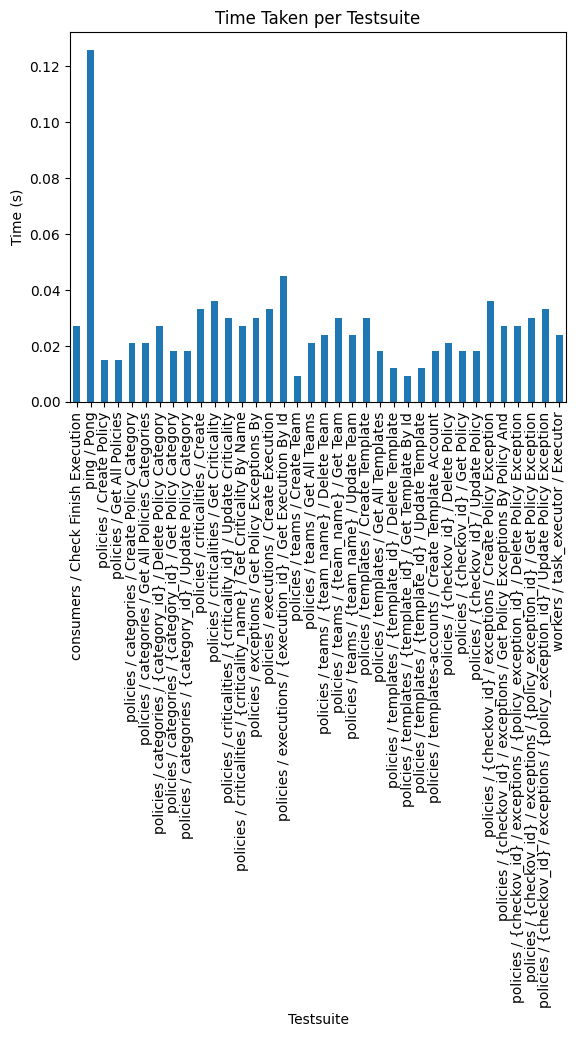

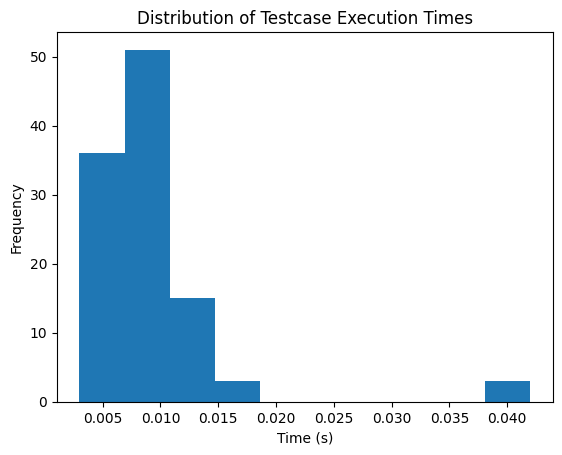

In [28]:
# Group by testsuite and sum the time
testsuite_time = df.groupby('testsuite')['time'].sum()

# Bar chart of time taken per testsuite
testsuite_time.plot(kind='bar')
plt.xlabel('Testsuite')
plt.ylabel('Time (s)')
plt.title('Time Taken per Testsuite')
plt.show()

# Histogram of testcase execution times
plt.hist(df['time'], bins=10)
plt.xlabel('Time (s)')
plt.ylabel('Frequency')
plt.title('Distribution of Testcase Execution Times')
plt.show()